In [37]:
import pandas as pd
import numpy as np

import string
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
pd.set_option('display.max_rows', None)

In [39]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [40]:
train.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [41]:
test.head(2)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."


# EDA

In [42]:
print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


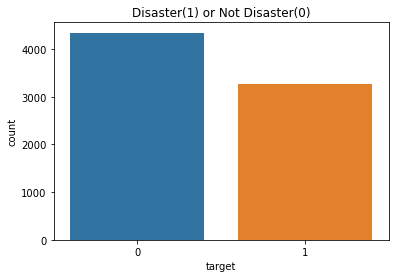

In [43]:
sns.countplot(x="target", data=train)
plt
plt.title("Disaster(1) or Not Disaster(0)")
plt.show()

<AxesSubplot:>

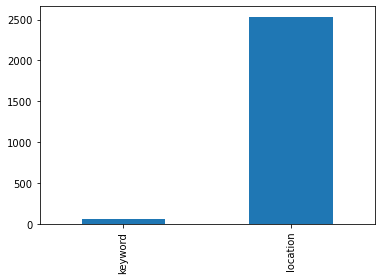

In [44]:
# Cheking for null values of the train dataframe

null = train.isnull().sum()
null = null[null > 0]
null.sort_values(inplace=True)
null.plot.bar()

<AxesSubplot:>

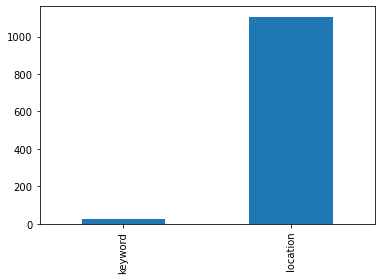

In [45]:
# Cheking for null values of the test dataframe

null = test.isnull().sum()
null = null[null > 0]
null.sort_values(inplace=True)
null.plot.bar()

In [46]:
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [47]:
test.dtypes

id           int64
keyword     object
location    object
text        object
dtype: object

In [48]:
# We need to replace symbols with nothing in the text feature


In [49]:
from tqdm import tqdm

text_list = list(train['text'])

clear_text_list = [] 

for i in tqdm(range(len(text_list))):
    clear_text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',text_list[i])
    #re.sub 
    clear_text_list.append(clear_text.lower())
    #lower
    
train['clear_text'] = clear_text_list


100%|██████████| 7613/7613 [00:00<00:00, 325912.08it/s]


In [51]:
train.head(10)

,id,keyword,location,text,target,clear_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy 20 closed in ...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain causes flash floodin...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,im on top of the hill and i can see a fire in ...
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,theres an emergency evacuation happening now i...
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,im afraid that the tornado is coming to our area
